# Reducing Gender Bias in Word Embeddings

In [ ]:
import gensim.models
import gdown
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import random
import json

In [ ]:
url = 'https://drive.google.com/u/0/uc?id=1NH6jcrg8SXbnhpIXRIXF_-KUE7wGxGaG&export=download'
fname = 'w2v.zip'
gdown.download(url, fname, quiet=False)
!unzip w2v.zip
fname = 'w2v_gnews_small.txt'

Downloading...
From: https://drive.google.com/u/0/uc?id=1NH6jcrg8SXbnhpIXRIXF_-KUE7wGxGaG&export=download
To: /content/w2v.zip
100%|██████████| 29.1M/29.1M [00:00<00:00, 90.1MB/s]


Archive:  w2v.zip
  inflating: w2v_gnews_small.txt     


In [ ]:
vecs = []
words = []

with open(fname, "r", encoding='utf8') as f:
  for line in f:
      s = line.split()
      v = np.array([float(x) for x in s[1:]])
      if len(vecs) and vecs[-1].shape!=v.shape:
          continue
      words.append(s[0])
      vecs.append(v)

In [ ]:
w2v_dict = {}
for i,word in enumerate(words):
  w2v_dict[word] = vecs[i]

In [ ]:
w2v_dict['human'].shape

(300,)

In [ ]:
len(words)

26423

In [ ]:
tsne_ = TSNE(perplexity=40, n_components=3, init='pca', n_iter=250, random_state=42)
tsne_.fit(vecs[:5000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


TSNE(init='pca', n_components=3, n_iter=250, perplexity=40, random_state=42)

In [ ]:
def tsne_plot(words,vecs):
    new_values = tsne_.fit_transform(vecs)
    x = []
    y = []
    z = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        z.append(value[2])
        
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    for i in range(len(x)):
        ax.scatter3D(x[i],y[i],z[i])
        ax.text(x[i], y[i], z[i], '%s' % (words[i]), size=10, zorder=1, color='k')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


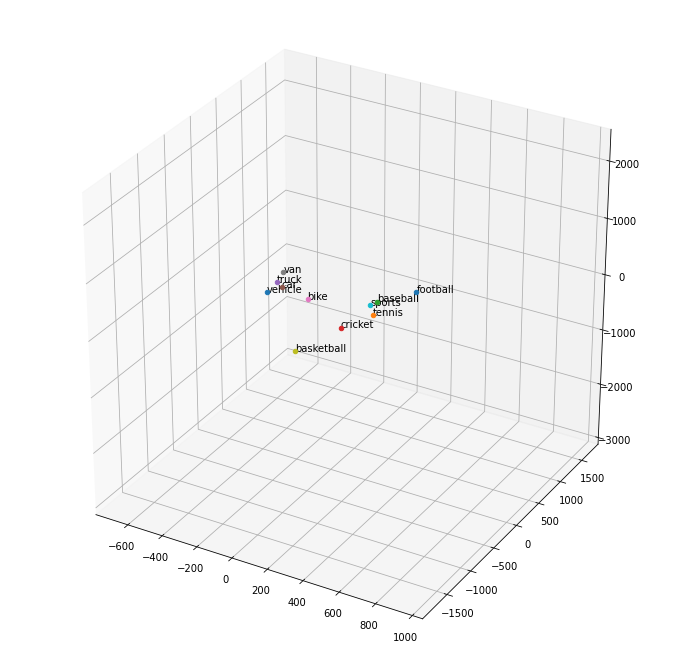

In [ ]:
test = ['football','tennis','baseball','cricket','truck','car','bike','van','basketball','sports','vehicle']
tsne_plot(test,[w2v_dict[i] for i in test])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


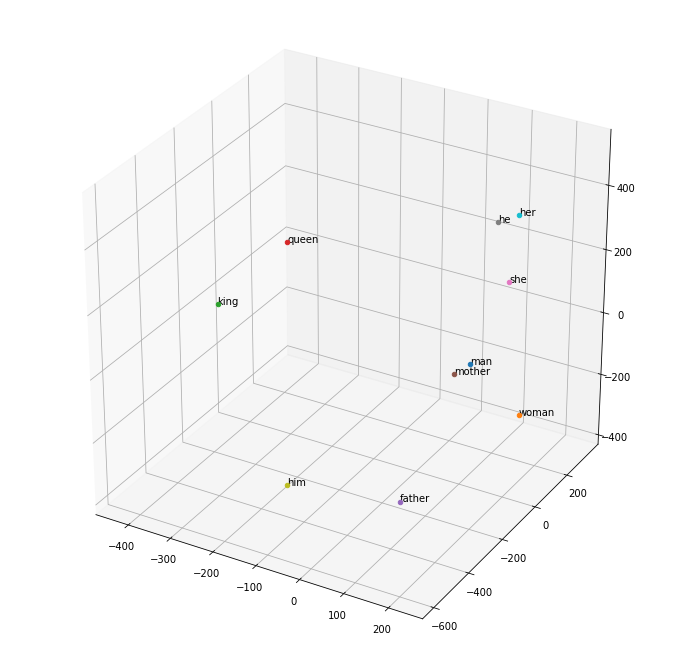

In [ ]:
test = ['man','woman','king','queen','father','mother','she','he','him','her']
tsne_plot(test,[w2v_dict[i] for i in test])

In [ ]:
gender_v = w2v_dict['she'] - w2v_dict['he'] 
gender_v = gender_v / np.linalg.norm(gender_v)

In [ ]:
thresh1 = 1
thresh2 = 0.5
for i in range(len(words)):
  for j in range(len(words)):
    if(i==j): continue
    if(np.linalg.norm(vecs[i]-vecs[j])>thresh1): continue
    x = vecs[i]
    y = vecs[j]
    diff = (x-y)
    diff = diff/np.linalg.norm(diff)
    if(np.dot(diff,gender_v)>= thresh2):
      print(words[i],'-',words[j],np.dot(diff,gender_v))

her - his 0.9077806940807972
she - he 1.0000000000000002


KeyboardInterrupt: ignored

In [ ]:
!wget https://raw.githubusercontent.com/simsong/debiaswe/master/data/professions.json

--2022-04-29 18:13:49--  https://raw.githubusercontent.com/simsong/debiaswe/master/data/professions.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8143 (8.0K) [text/plain]
Saving to: ‘professions.json’

professions.json    100%[===================>]   7.95K  --.-KB/s    in 0s      

2022-04-29 18:13:49 (58.0 MB/s) - ‘professions.json’ saved [8143/8143]



In [ ]:
professions = []
with open('./professions.json','r') as f:
   txt = f.read().split('"')
   for l in txt:
     if(re.match('\w+',l)):
       print(l,end=',')
       professions.append(l)

accountant,acquaintance,actor,actress,adjunct_professor,administrator,adventurer,advocate,aide,alderman,alter_ego,ambassador,analyst,anthropologist,archaeologist,archbishop,architect,artist,artiste,assassin,assistant_professor,associate_dean,associate_professor,astronaut,astronomer,athlete,athletic_director,attorney,author,baker,ballerina,ballplayer,banker,barber,baron,barrister,bartender,biologist,bishop,bodyguard,bookkeeper,boss,boxer,broadcaster,broker,bureaucrat,businessman,businesswoman,butcher,butler,cab_driver,cabbie,cameraman,campaigner,captain,cardiologist,caretaker,carpenter,cartoonist,cellist,chancellor,chaplain,character,chef,chemist,choreographer,cinematographer,citizen,civil_servant,cleric,clerk,coach,collector,colonel,columnist,comedian,comic,commander,commentator,commissioner,composer,conductor,confesses,congressman,constable,consultant,cop,correspondent,councilman,councilor,counselor,critic,crooner,crusader,curator,custodian,dad,dancer,dean,dentist,deputy,dermatologist

In [ ]:
for p in professions:
  if(random.random()>=0.9):
    print(p,np.dot(gender_v,w2v_dict[p]))

acquaintance -0.022328893199162477
administrator 0.07803116941346933
ballerina 0.2527646572896273
bartender 0.056525902723427335
cab_driver -0.053107732547322456
cabbie -0.0497985064902187
cameraman -0.09275914860275151
cinematographer -0.08134563596509943
comedian -0.06403619325703967
commentator -0.10962006715526022
fighter_pilot -0.14401693150438472
firebrand -0.09613172059721009
fisherman -0.1038534789030379
foreman -0.10369657682752668
guidance_counselor 0.18262598477449027
maid 0.2377612604596413
missionary 0.024957977412394697
negotiator -0.05296998532884896
paralegal 0.2494615923843523
plumber -0.08771007278548537
prisoner -0.049564527183174154
professor_emeritus -0.04579067154936032
sculptor -0.004476091700160049
singer_songwriter 0.11373048360933204
socialite 0.25718822677251896
sociologist 0.03979840621184134
soft_spoken -0.11563748257525754
strategist -0.09420477512612302
superintendent 0.014919133712547519
warden 0.006342818364838236
writer -0.026561978717399307


In [ ]:
!wget https://raw.githubusercontent.com/simsong/debiaswe/master/data/gender_specific_full.json
!wget https://raw.githubusercontent.com/tolga-b/debiaswe/master/data/equalize_pairs.json
!wget https://raw.githubusercontent.com/tolga-b/debiaswe/master/data/definitional_pairs.json

with open('./gender_specific_full.json', "r") as f:
  gender_specific = json.loads(f.read())
with open('./equalize_pairs.json', "r") as f:
  eq_pairs = json.loads(f.read())
with open('./definitional_pairs.json', "r") as f:
  def_pairs = json.loads(f.read())


--2022-04-29 18:13:50--  https://raw.githubusercontent.com/simsong/debiaswe/master/data/gender_specific_full.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19668 (19K) [text/plain]
Saving to: ‘gender_specific_full.json’

gender_specific_ful 100%[===================>]  19.21K  --.-KB/s    in 0.001s  

2022-04-29 18:13:50 (26.3 MB/s) - ‘gender_specific_full.json’ saved [19668/19668]

--2022-04-29 18:13:50--  https://raw.githubusercontent.com/tolga-b/debiaswe/master/data/equalize_pairs.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [ ]:
w_idx = {}
for i,w in enumerate(words):
  w_idx[w] = i

vecs_new = list(vecs)

In [ ]:
def drop(u, v):
    return u - v * u.dot(v) / v.dot(v)
  
def doPCA(pairs, num_components = 10):
    matrix = []
    for a, b in pairs:
        center = (w2v_dict[a] + w2v_dict[b])/2
        matrix.append(w2v_dict[a] - center)
        matrix.append(w2v_dict[b] - center)
    matrix = np.array(matrix)
    pca = PCA(n_components = num_components)
    pca.fit(matrix)
    return pca


def debias(gender_specific_words, definitional, equalize):
    gender_direction = doPCA(definitional).components_[0]
    specific_set = set(gender_specific_words)
    for i, w in enumerate(words):
        if w not in specific_set:
            vecs_new[i] = drop(vecs_new[i], gender_direction)
    candidates = {x for e1, e2 in equalize for x in [(e1.lower(), e2.lower()),(e1.title(), e2.title()),(e1.upper(), e2.upper())]}
    for (a, b) in candidates:
        if (a in words and b in words):
            print(a,b)
            y = drop((w2v_dict[a] + w2v_dict[b]) / 2, gender_direction)
            z = np.sqrt(1 - np.linalg.norm(y)**2)
            if (w2v_dict[a] - w2v_dict[b]).dot(gender_direction) < 0:
                z = -z
            vecs_new[w_idx[a]] = z * gender_direction + y
            vecs_new[w_idx[b]] = -z * gender_direction + y

In [ ]:
debias(gender_specific, def_pairs, eq_pairs)

wives husbands
grandsons granddaughters
gelding mare
son daughter
spokesman spokeswoman
uncle aunt
dads moms
prince princess
grandpa grandma
prostate_cancer ovarian_cancer
fatherhood motherhood
twin_brother twin_sister
men women
councilman councilwoman
man woman
brothers sisters
kings queens
sons daughters
grandfather grandmother
male female
congressman congresswoman
gentlemen ladies
his her
males females
grandson granddaughter
schoolboy schoolgirl
boys girls
king queen
nephew niece
chairman chairwoman
fraternity sorority
ex_girlfriend ex_boyfriend
himself herself
businessman businesswoman
monastery convent
dad mom
brother sister
father mother
gentleman lady
boy girl
he she
colt filly
fathers mothers
dudes gals
testosterone estrogen


In [ ]:
# evaluatation
gender_v = w2v_dict['man'] - w2v_dict['woman'] 
gender_v = gender_v / np.linalg.norm(gender_v)

new_gender_v = vecs_new[w_idx['man']] - vecs_new[w_idx['woman']] 
new_gender_v = new_gender_v / np.linalg.norm(new_gender_v)

avg_error = 0
new_avg_error = 0

for p in professions:
  if(random.random()>=1.1):
    print(p,np.dot(gender_v,w2v_dict[p]),np.dot(new_gender_v,w2v_dict[p]))
  avg_error += abs(np.dot(gender_v,w2v_dict[p]))
  new_avg_error += abs(np.dot(new_gender_v,w2v_dict[p]))
  
print('old_bias',avg_error/len(professions))
print('after debias',new_avg_error/len(professions))

old_bias 0.08214705283798387
after debias 0.08050746415928331


In [ ]:
# evaluatation 2
gender_v = w2v_dict['he'] - w2v_dict['she'] 
gender_v = gender_v / np.linalg.norm(gender_v)

new_gender_v = vecs_new[w_idx['he']] - vecs_new[w_idx['she']] 
new_gender_v = new_gender_v / np.linalg.norm(new_gender_v)

avg_error = 0
new_avg_error = 0

for p in professions:
  if(random.random()>=1.1):
    print(p,np.dot(gender_v,w2v_dict[p]),np.dot(new_gender_v,w2v_dict[p]))
  avg_error += abs(np.dot(gender_v,w2v_dict[p]))
  new_avg_error += abs(np.dot(new_gender_v,w2v_dict[p]))
  
print('old_bias',avg_error/len(professions))
print('after debias',new_avg_error/len(professions))

old_bias 0.07808981738323752
after debias 0.08050746415928331


In [ ]:
# evaluatation 3
gender_v = w2v_dict['male'] - w2v_dict['female'] 
gender_v = gender_v / np.linalg.norm(gender_v)

new_gender_v = vecs_new[w_idx['male']] - vecs_new[w_idx['female']] 
new_gender_v = new_gender_v / np.linalg.norm(new_gender_v)

avg_error = 0
new_avg_error = 0

for p in professions:
  if(random.random()>=1.1):
    print(p,np.dot(gender_v,w2v_dict[p]),np.dot(new_gender_v,w2v_dict[p]))
  avg_error += abs(np.dot(gender_v,w2v_dict[p]))
  new_avg_error += abs(np.dot(new_gender_v,w2v_dict[p]))
  
print('old_bias',avg_error/len(professions))
print('after debias',new_avg_error/len(professions))

old_bias 0.05675906737256327
after debias 0.0805074641592833


In [ ]:
# Was able to find that individual bias was not removed by the hard debiasing method
# Whereas pair biases were completely removed as shown in next example
# Analogies are retreived

In [ ]:
# Male : Father :: Female : Mother
v1 = w2v_dict['male'] - w2v_dict['female'] 
v1 = v1 / np.linalg.norm(v1)

v1_new = vecs_new[w_idx['male']] - vecs_new[w_idx['female']] 
v1_new = v1_new / np.linalg.norm(v1_new)


v2 = w2v_dict['father'] - w2v_dict['mother'] 
v2 = v2 / np.linalg.norm(v2)

v2_new = vecs_new[w_idx['father']] - vecs_new[w_idx['mother']] 
v2_new = v2_new / np.linalg.norm(v2_new)


print('original', np.dot(v1,v2))
print('after hard debias', np.dot(v1_new,v2_new))

original 0.2208690641177773
after hard debias 1.0


In [ ]:
new_gender_v = vecs_new[w_idx['male']] - vecs_new[w_idx['female']] 
new_gender_v = new_gender_v / np.linalg.norm(new_gender_v)
for p in professions:
  debiased_vec = drop(vecs_new[w_idx[p]]/np.linalg.norm(vecs_new[w_idx[p]]), new_gender_v)
  debiased_vec = debiased_vec/np.linalg.norm(debiased_vec)
  print(p,format(np.dot(new_gender_v,debiased_vec),'0.4f'))

accountant 0.0000
acquaintance -0.0000
actor -0.0000
actress -0.0000
adjunct_professor -0.0000
administrator -0.0000
adventurer -0.0000
advocate -0.0000
aide 0.0000
alderman -0.0000
alter_ego -0.0000
ambassador -0.0000
analyst -0.0000
anthropologist 0.0000
archaeologist 0.0000
archbishop 0.0000
architect 0.0000
artist -0.0000
artiste -0.0000
assassin 0.0000
assistant_professor -0.0000
associate_dean -0.0000
associate_professor -0.0000
astronaut -0.0000
astronomer -0.0000
athlete -0.0000
athletic_director -0.0000
attorney -0.0000
author -0.0000
baker -0.0000
ballerina -0.0000
ballplayer -0.0000
banker 0.0000
barber 0.0000
baron -0.0000
barrister -0.0000
bartender -0.0000
biologist -0.0000
bishop 0.0000
bodyguard 0.0000
bookkeeper 0.0000
boss 0.0000
boxer 0.0000
broadcaster 0.0000
broker 0.0000
bureaucrat -0.0000
businessman 0.0000
businesswoman -0.0000
butcher 0.0000
butler 0.0000
cab_driver -0.0000
cabbie -0.0000
cameraman 0.0000
campaigner -0.0000
captain 0.0000
cardiologist -0.0000
c